# <font color='red'>Credit Score Model
---

In [1]:
# Importing neccesary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys

# Library to split data
from sklearn.model_selection import train_test_split

# Library to remove the mean and scales each feature/variable to unit variance
from sklearn.preprocessing import StandardScaler

# Libraries and modules for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Library to measure any distortion in our dataset as a result of Imputation
from sklearn.metrics import mean_squared_error

### <font color='lightgreen'>Importing Libraries and modules for Machine Learning

**Kindly install missingpy if not present**

In [2]:
# !pip install missingpy

In [3]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [4]:
# Library to fill in missing values in a dataset using the k-Nearest Neighbors method
from sklearn.impute import KNNImputer
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
# Importing the MissForest class
from missingpy import MissForest

# Libraries and modules for Machine Learning

# For Logistic Regression
from sklearn.linear_model import LogisticRegression
# For K Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier
# For Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# For Random Forests
from sklearn.ensemble import RandomForestClassifier
# For forward stepwise selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# For Deep Learning 
import tensorflow as tf
from tensorflow import keras

### <font color='lightgreen'>Reading the Dataset from Excel Sheet
**<font color='yellow'>Data Collection** : It is the process of collecting an adequate Dataset to obtain information that can <br>
be used to support decision making. <br>
Data Collection is a highly context dependent process (depends on the existing systems, databases and their <br>
schemas, operating environments etc that hold credit data). <br>
Here, we have our data in form of an excel sheet.


In [5]:
df = pd.read_excel("a_Dataset_CreditScoring.xlsx")

## <font color='lightgreen'>Exploratory Data Analysis

### <font color='lightgreen'>Data Review
**<font color='yellow'>Risk Data Review** denotes a process of systematic analysis of the relevant Risk Data used by an organization towards <br>
concrete Risk Management / business objectives or regulatory reporting.<br>
Here, we are trying to get a better understanding of our data set and get some insights about our customers


In [6]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


<font color='yellow'>Our dataset consisting of data for 3000 customers with 28 feature variables for each customer and <br>
each of them categorised as "*Defaulter*" or "*Good Loan*" <br>

In [7]:
df.shape

(3000, 30)

<font color='yellow'>List of all the feature variables i.e. different parameters based <br>
on which Target Variable is being determined

In [8]:
df.columns[2:]

Index(['DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06', 'InqTimeLast',
       'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast', 'TLCnt03', 'TLCnt12',
       'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TLDel60Cnt',
       'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct',
       'TLDel3060Cnt24', 'TLDel90Cnt24', 'TLDel60CntAll', 'TLOpenPct',
       'TLBadDerogCnt', 'TLDel60Cnt24', 'TLOpen24Pct'],
      dtype='object')

<font color='yellow'>Since, Customer ID should not be impacting whether a customer is a "*Defaulter*" or it is a "*Good Loan*". <br>
So, we drop the variable **ID** from our data set df

In [9]:
df.drop("ID", axis = 1, inplace = True)

In [10]:
Total_customers = len(df)
normal = len(df[df["TARGET"] == 0])
fraudulent = len(df[df["TARGET"] == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(('Total number of Customers are {}'.format(Total_customers)))
print(('Number of Normal Customers are {}'.format(normal)))
print(('Number of fraudulent Customers are {}'.format(fraudulent)))
print(('Percentage of fraud Customers is {}'.format(fraud_percentage)))

Total number of Customers are 3000
Number of Normal Customers are 2500
Number of fraudulent Customers are 500
Percentage of fraud Customers is 20.0


<font color='yellow'>In an attempt to know our data set better, we extract info about it. <br>
It is clear that we have missing data or *Null Entries* in our data set which can be a result of <br>
unavailability of *Significant Credit History*

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   DerogCnt         3000 non-null   int64  
 2   CollectCnt       3000 non-null   int64  
 3   BanruptcyInd     3000 non-null   int64  
 4   InqCnt06         3000 non-null   int64  
 5   InqTimeLast      2812 non-null   float64
 6   InqFinanceCnt24  3000 non-null   int64  
 7   TLTimeFirst      3000 non-null   int64  
 8   TLTimeLast       3000 non-null   int64  
 9   TLCnt03          3000 non-null   int64  
 10  TLCnt12          3000 non-null   int64  
 11  TLCnt24          3000 non-null   int64  
 12  TLCnt            2997 non-null   float64
 13  TLSum            2960 non-null   float64
 14  TLMaxSum         2960 non-null   float64
 15  TLSatCnt         2996 non-null   float64
 16  TLDel60Cnt       3000 non-null   int64  
 17  TLBadCnt24    

In [12]:
df.describe()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,0.275000,...,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,0.582084,...,3.108076,0.266486,0.234759,1.163633,1.609508,3.407255,0.206722,2.460434,1.806124,0.480105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,...,2.000000,0.501100,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,...,3.000000,0.695500,0.527050,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,0.000000,...,6.000000,0.840650,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


### <font color='lightgreen'>Identify and treatment of nulls in Data

In [13]:
sum = df.isna().sum() 
# Number of null values in each feature variable
sum

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

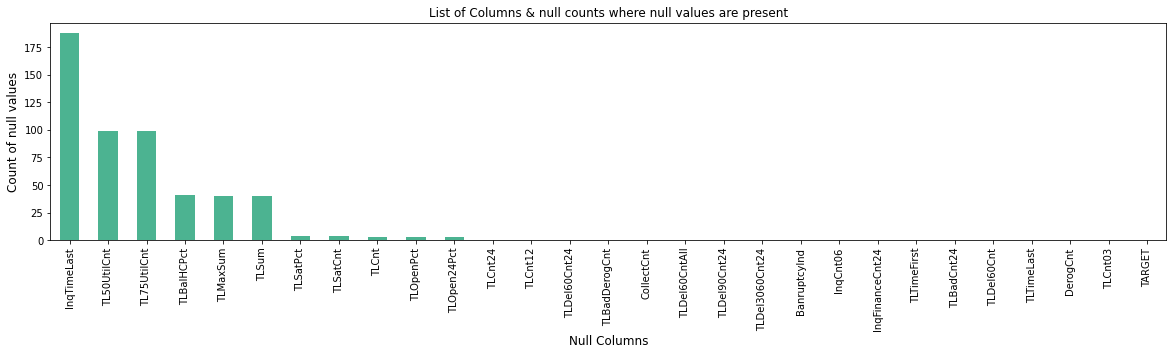

In [14]:
null_col = df.isnull().sum().sort_values(ascending = False)

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are present') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

In [15]:
df.isna().sum().max()
# Maximum possible number of rows with NA value

188

<font color='yellow'>Seprating the feature variables with null entries to measure the distortion <br>
in our dataset after we predict the missing values.

In [16]:
df_na = pd.DataFrame({'Category':sum.index, 'Sums':sum.values})

In [17]:
df_na = df_na[df_na["Sums"]!=0] # Extracting only variables with null entries
pd.Index(df_na["Category"])

Index(['InqTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt',
       'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct'],
      dtype='object', name='Category')

In [18]:
df[['InqTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt',
       'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct']].isna().sum()

InqTimeLast    188
TLCnt            3
TLSum           40
TLMaxSum        40
TLSatCnt         4
TL75UtilCnt     99
TL50UtilCnt     99
TLBalHCPct      41
TLSatPct         4
TLOpenPct        3
TLOpen24Pct      3
dtype: int64

In [19]:
df[['InqTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TL75UtilCnt',
       'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct']].describe()

,InqTimeLast,TLCnt,TLSum,TLMaxSum,TLSatCnt,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct
count,2812.000000,2997.000000,2960.000000,2960.000000,2996.000000,2901.000000,2901.000000,2959.000000,2996.000000,2997.000000,2997.000000
mean,3.108108,7.879546,20151.095608,31205.900676,13.511682,3.121682,4.077904,0.648178,0.518331,0.496168,0.564219
std,4.637831,5.421595,19682.086262,29092.908099,8.931769,2.605435,3.108076,0.266486,0.234759,0.206722,0.480105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,5699.750000,10236.000000,6.000000,1.000000,2.000000,0.501100,0.352900,0.344800,0.250000
50%,1.000000,7.000000,15546.500000,24188.500000,12.000000,3.000000,3.000000,0.695500,0.527050,0.500000,0.500000
75%,3.000000,11.000000,28303.250000,44756.250000,19.000000,4.000000,6.000000,0.840650,0.681800,0.625000,0.800000
max,24.000000,40.000000,210612.000000,271036.000000,57.000000,20.000000,23.000000,3.361300,1.000000,1.000000,6.000000


### <font color='lightgreen'>Solving Issue of **Lack Of Credit History**
<img src="plots/Imputation_.png" style="height: 540px; width:800px;"/>


**<font color='yellow'>Since we will be presenting 2 Methods to Impute the Missing Values.**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**<font color='yellow'>We make copies of our dataset df**

In [20]:
# Making copying of our dataset to test accuracy of each imputation
df_simple = df.copy()
df_kNN = df.copy()
#Removing Data is not a solution

#### <font color='lightgreen'>Missing data imputation Using Simple Imputation
**<font color='yellow'>In statistics, imputation is the process of replacing missing data with substituted values.** <br>
Completing our dataset by filling the missing information using the row average method for that feature variable.<br>


In [21]:
# Imputer object using the mean strategy and
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')

In [22]:
# Fitting the data to the imputer object
imputer = imputer.fit(df_simple)

In [23]:
df_simple_trans = imputer.transform(df_simple)

<font color='yellow'>We get the complete predicted data set in array form, which is now converted to a final <br>
datafram *df_simple_trans*

In [24]:
df_simple_trans = pd.DataFrame(data = df_simple_trans, index = df_simple.index, columns = df_simple.columns)
df_simple_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   float64
 1   DerogCnt         3000 non-null   float64
 2   CollectCnt       3000 non-null   float64
 3   BanruptcyInd     3000 non-null   float64
 4   InqCnt06         3000 non-null   float64
 5   InqTimeLast      3000 non-null   float64
 6   InqFinanceCnt24  3000 non-null   float64
 7   TLTimeFirst      3000 non-null   float64
 8   TLTimeLast       3000 non-null   float64
 9   TLCnt03          3000 non-null   float64
 10  TLCnt12          3000 non-null   float64
 11  TLCnt24          3000 non-null   float64
 12  TLCnt            3000 non-null   float64
 13  TLSum            3000 non-null   float64
 14  TLMaxSum         3000 non-null   float64
 15  TLSatCnt         3000 non-null   float64
 16  TLDel60Cnt       3000 non-null   float64
 17  TLBadCnt24    

#### <font color='lightgreen'>Missing data imputation Using kNN Imputation<font color='yellow'>
Using  *Nearest Neighbour Imputation Strategy* for missing data and replace missing values for each column in the input data prior <br>
to prediction.<br>
Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements <br>
or unavailability. <br>
We will create a model to predict the missing values. A model is created for each feature that has missing values, taking as input <br>
values of perhaps all other input features. Using *K-nearest neighbor model* , a new sample is imputed by finding the samples in the <br>
training set “closest” to it and averaging the nearby points to fill in the value.<br>
We will show that *kNN impute* appears to provide a more robust and sensitive method for missing value estimation and kNN impute surpass the <br>
commonly used *row average method* (as well as filling missing values with zeros). Configuration of KNN imputation often involves selecting <br>
the distance measure (e.g. Euclidean) and the number of contributing neighbors for each prediction, the k hyperparameter of the KNN algorithm.


In [25]:
# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

In [26]:
# fit on the dataset
imputer.fit(df_kNN)

KNNImputer(n_neighbors=3)

In [27]:
# transform the dataset
df_kNN_trans = imputer.transform(df_kNN)

<font color='yellow'>We get the complete predicted data set in array form, which is now converted to a final <br>
datafram *df_kNN_trans*

In [28]:
df_kNN_trans = pd.DataFrame(data = df_kNN_trans, index = df_kNN.index, columns = df_kNN.columns)

In [29]:
df_kNN_trans.head()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,0.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,0.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,0.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,0.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,0.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


In [30]:
df_kNN_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   float64
 1   DerogCnt         3000 non-null   float64
 2   CollectCnt       3000 non-null   float64
 3   BanruptcyInd     3000 non-null   float64
 4   InqCnt06         3000 non-null   float64
 5   InqTimeLast      3000 non-null   float64
 6   InqFinanceCnt24  3000 non-null   float64
 7   TLTimeFirst      3000 non-null   float64
 8   TLTimeLast       3000 non-null   float64
 9   TLCnt03          3000 non-null   float64
 10  TLCnt12          3000 non-null   float64
 11  TLCnt24          3000 non-null   float64
 12  TLCnt            3000 non-null   float64
 13  TLSum            3000 non-null   float64
 14  TLMaxSum         3000 non-null   float64
 15  TLSatCnt         3000 non-null   float64
 16  TLDel60Cnt       3000 non-null   float64
 17  TLBadCnt24    

#### <font color='yellow'>We have overcome the problem of missing values in our dataset.<br>Or we can say the issue of lack of significant credit history
#### Since kNN Imputation is more accurate, we will be working on dataset with kNN Imputed Values


In [31]:
df = df_kNN_trans.copy() # Updating df with our dataset worked upon via kNN Imputation & no null values

In [32]:
df.head()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,0.0,...,3.0,0.9179,0.2083,2.0,3.0,7.0,0.2083,4.0,4.0,0.0000
1,1.0,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,0.0,...,1.0,0.8000,0.0000,0.0,0.0,0.0,1.0000,12.0,0.0,1.0000
2,1.0,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,0.0,...,5.0,0.3552,0.6538,0.0,1.0,1.0,0.7308,1.0,1.0,0.5263
3,1.0,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,0.0,...,3.0,0.9127,0.2500,1.0,1.0,1.0,0.7500,7.0,1.0,1.3333
4,1.0,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,0.0,...,1.0,1.2511,0.0000,0.0,1.0,4.0,0.1429,3.0,1.0,0.0000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   float64
 1   DerogCnt         3000 non-null   float64
 2   CollectCnt       3000 non-null   float64
 3   BanruptcyInd     3000 non-null   float64
 4   InqCnt06         3000 non-null   float64
 5   InqTimeLast      3000 non-null   float64
 6   InqFinanceCnt24  3000 non-null   float64
 7   TLTimeFirst      3000 non-null   float64
 8   TLTimeLast       3000 non-null   float64
 9   TLCnt03          3000 non-null   float64
 10  TLCnt12          3000 non-null   float64
 11  TLCnt24          3000 non-null   float64
 12  TLCnt            3000 non-null   float64
 13  TLSum            3000 non-null   float64
 14  TLMaxSum         3000 non-null   float64
 15  TLSatCnt         3000 non-null   float64
 16  TLDel60Cnt       3000 non-null   float64
 17  TLBadCnt24    

In [34]:
df.describe()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.166667,1.430000,0.857000,0.153333,3.108333,3.031000,3.555000,170.113667,11.873667,0.275000,...,3.963111,0.648011,0.518102,0.726000,0.814667,2.522000,0.496263,1.409000,1.068333,0.563803
std,0.372740,2.731469,2.161352,0.360369,3.479171,4.518525,4.477536,92.813700,16.321412,0.582084,...,3.122125,0.265845,0.234719,1.163633,1.609508,3.407255,0.206714,2.460434,1.806124,0.480076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,...,2.000000,0.501325,0.352175,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,...,3.000000,0.694450,0.526300,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,0.000000,...,5.000000,0.840600,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


### <font color='lightgreen'> Correlation & Outliers


#### <font color='lightgreen'> Correlation 

In [35]:
# Correlation Values for all our feature variables
corr_ls = {}
for i in df.columns:
    print(i,end=" : ")
    print(df["TARGET"].corr(df[i]))
    corr_ls[i] = df["TARGET"].corr(df[i])

TARGET : 1.0
DerogCnt : 0.08809950482569641
CollectCnt : 0.09374759560019312
BanruptcyInd : 0.025651390561269416
InqCnt06 : 0.10666335429785354
InqTimeLast : -0.028542076710441077
InqFinanceCnt24 : 0.13256206912118854
TLTimeFirst : -0.06959733719304571
TLTimeLast : 0.030647914237164
TLCnt03 : -0.03611602249447912
TLCnt12 : -0.012390690239577703
TLCnt24 : -0.009525041339920338
TLCnt : -0.04420406425729743
TLSum : 0.009987979199148626
TLMaxSum : -0.04795084455076164
TLSatCnt : -0.07904578452533369
TLDel60Cnt : 0.1859420522249776
TLBadCnt24 : 0.16379569726446536
TL75UtilCnt : 0.09599649620267106
TL50UtilCnt : 0.07080425163237881
TLBalHCPct : 0.16784540754190333
TLSatPct : -0.25394861873673247
TLDel3060Cnt24 : 0.23370871176871744
TLDel90Cnt24 : 0.2115773515150395
TLDel60CntAll : 0.19586263533134396
TLOpenPct : -0.0659112797550014
TLBadDerogCnt : 0.20815224890058837
TLDel60Cnt24 : 0.2520259920769903
TLOpen24Pct : 0.03358475553079729


In [36]:
# Series with correlation values sorted 
series = pd.Series(corr_ls).sort_values(ascending = False)

In [37]:
series

TARGET             1.000000
TLDel60Cnt24       0.252026
TLDel3060Cnt24     0.233709
TLDel90Cnt24       0.211577
TLBadDerogCnt      0.208152
TLDel60CntAll      0.195863
TLDel60Cnt         0.185942
TLBalHCPct         0.167845
TLBadCnt24         0.163796
InqFinanceCnt24    0.132562
InqCnt06           0.106663
TL75UtilCnt        0.095996
CollectCnt         0.093748
DerogCnt           0.088100
TL50UtilCnt        0.070804
TLOpen24Pct        0.033585
TLTimeLast         0.030648
BanruptcyInd       0.025651
TLSum              0.009988
TLCnt24           -0.009525
TLCnt12           -0.012391
InqTimeLast       -0.028542
TLCnt03           -0.036116
TLCnt             -0.044204
TLMaxSum          -0.047951
TLOpenPct         -0.065911
TLTimeFirst       -0.069597
TLSatCnt          -0.079046
TLSatPct          -0.253949
dtype: float64

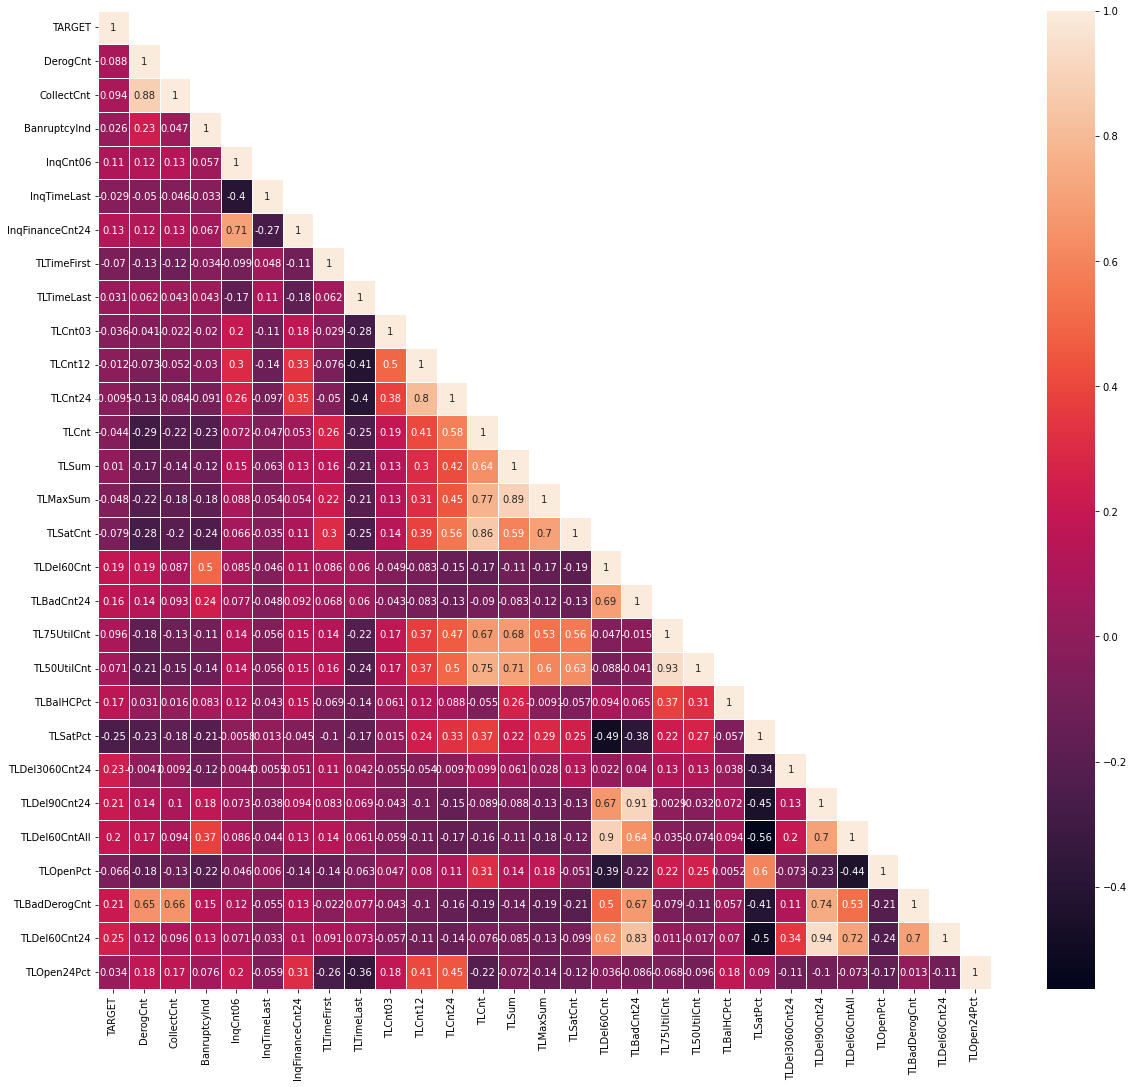

In [38]:
corr = df.corr()
plt.figure(figsize=(20,18))
#convert correlation to numpy array
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, annot= True, linewidths=.5, mask = mask);

#### <font color='lightgreen'> Outliers

/Users/prithvichauhan/miniforge3/envs/viper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


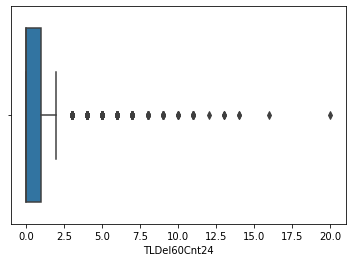

In [39]:
sns.boxplot(df_kNN_trans["TLDel60Cnt24"]);

/Users/prithvichauhan/miniforge3/envs/viper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


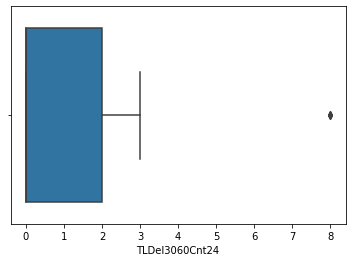

In [40]:
sns.boxplot(df_kNN_trans["TLDel3060Cnt24"]);

/Users/prithvichauhan/miniforge3/envs/viper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


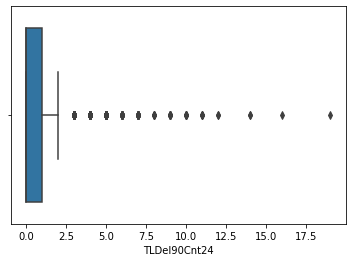

In [41]:
sns.boxplot(df_kNN_trans["TLDel90Cnt24"]);

/Users/prithvichauhan/miniforge3/envs/viper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


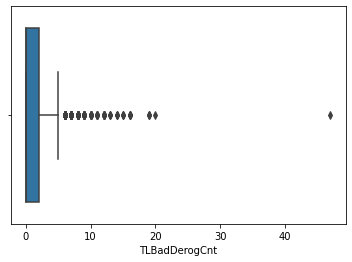

In [42]:
sns.boxplot(df_kNN_trans["TLBadDerogCnt"]);

In [43]:
df_ol = df.copy()
# Dataset with no data removed

In [44]:
# Highly correlated feature variables with our Target variable
# Removing Outliers only from them for the sake of not losing much data
ol_series = series.index[1:5]
ol_series

Index(['TLDel60Cnt24', 'TLDel3060Cnt24', 'TLDel90Cnt24', 'TLBadDerogCnt'], dtype='object')

In [45]:
# Function to calculate the range of our box
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
#Remove outliers for col
for i in ol_series:
    lower_1, upper_1 = remove_outlier(df[i])
    df = df.loc[(df[i] > lower_1) & (df[i] < upper_1)] 


In [46]:
df.shape

(2086, 29)

/Users/prithvichauhan/miniforge3/envs/viper/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


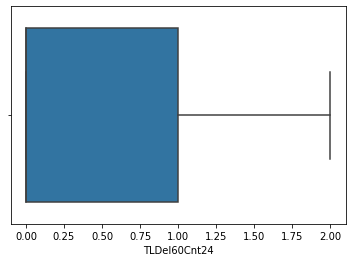

In [47]:
sns.boxplot(df["TLDel60Cnt24"]);
# Outliers are removed which might be affecting the Target variable the most

## <font color='lightgreen'> Model Building With Major Outliers Removed

### <font color='lightgreen'>Train Test Split

In [48]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1:29].values

In [49]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### <font color='yellow'>Risk Model building Using Logistic Regression

In [51]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred_LR = classifier.predict(X_test)

#### <font color='yellow'>Model performance

In [52]:
print(confusion_matrix(y_test,y_pred_LR))

[[379   1]
 [ 35   3]]


In [53]:
print(accuracy_score(y_test, y_pred_LR))

0.9138755980861244


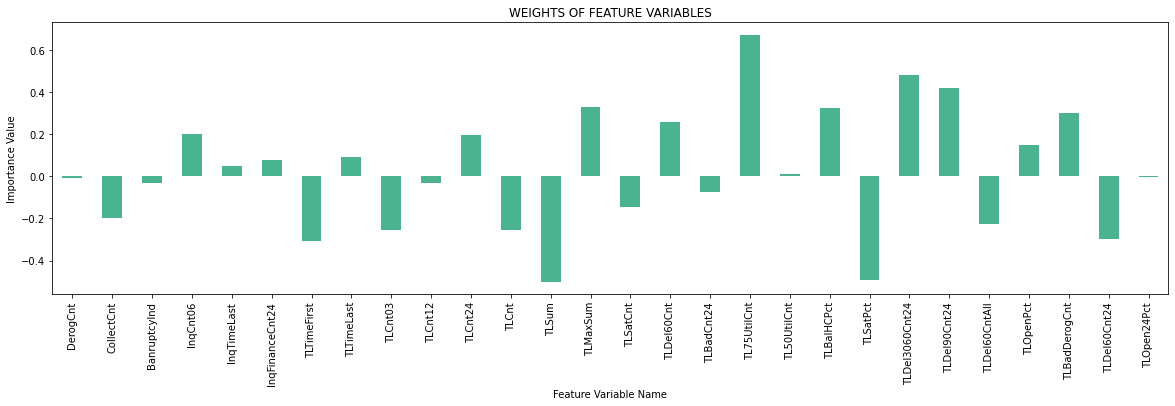

In [54]:
coef = classifier.coef_[0]
plt.figure(figsize=(20,5))
weights = (pd.Series(coef, index = df_kNN_trans.drop("TARGET", axis =1).columns))
weights.plot(kind='bar', color="#4CB391")   
plt.title("WEIGHTS OF FEATURE VARIABLES")
plt.xlabel("Feature Variable Name")
plt.ylabel("Importance Value");

### <font color='yellow'>Risk Model building Using k-NN

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred_kNN = knn.predict(X_test)

In [57]:
print(confusion_matrix(y_test,y_pred_kNN))

[[369  11]
 [ 36   2]]


In [58]:
print(accuracy_score(y_test, y_pred_kNN))

0.8875598086124402


### <font color='yellow'>Risk Model building Using Decision Trees

In [59]:

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
y_pred_DT = clf.predict(X_test)

In [61]:
print(confusion_matrix(y_test,y_pred_DT))

[[331  49]
 [ 34   4]]


In [62]:
print(accuracy_score(y_test, y_pred_DT))

0.8014354066985646


### <font color='yellow'>Risk Model building Using RandomForestClassifier

In [63]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=5, random_state=0)
clf_random.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=20, random_state=0)

In [64]:
# Build Forward Stepwise Selection
# Trying to select maximum relevant features
# Checking for set of 26 
sfs_RFC = sfs(clf_random,
            k_features=26,
            forward=True,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=5)
# Perform Forward Stepwise Selection
sfs_RFC = sfs_RFC.fit(X_train, y_train)
# Which features?
feat_cols = list(sfs_RFC.k_feature_idx_)
print(feat_cols)
clf_random_final = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=0)
clf_random_final.fit(X_train[:,feat_cols], y_train)
y_pred_RFC = clf_random_final.predict(X_test[:,feat_cols])
print(accuracy_score(y_test, y_pred_RFC))
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.8s finished

[2022-08-30 04:20:35] Features: 1/26 -- score: 0.8974843106579634[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.9s finished

[2022-08-30 04:20:37] Features: 2/26 -- score: 0.898083113053173[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.8s finished

[2022-08-30 04:20:38] Features: 3/26 -- score: 0.8968855082627538[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
0.9043062200956937


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished

[2022-08-30 04:21:10] Features: 26/26 -- score: 0.8968855082627536

In [65]:
# Build Forward Stepwise Selection
# Trying to select maximum relevant features
# Checking for set of 27
sfs_RFC = sfs(clf_random,
            k_features=27,
            forward=True,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=5)
# Perform Forward Stepwise Selection
sfs_RFC = sfs_RFC.fit(X_train, y_train)
# Which features?
feat_cols = list(sfs_RFC.k_feature_idx_)
print(feat_cols)
clf_random_final = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=0)
clf_random_final.fit(X_train[:,feat_cols], y_train)
y_pred_RFC = clf_random_final.predict(X_test[:,feat_cols])
print(accuracy_score(y_test, y_pred_RFC))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.8s finished

[2022-08-30 04:21:12] Features: 1/27 -- score: 0.8974843106579634[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.9s finished

[2022-08-30 04:21:14] Features: 2/27 -- score: 0.898083113053173[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.8s finished

[2022-08-30 04:21:16] Features: 3/27 -- score: 0.8968855082627538[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
0.9043062200956937


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2022-08-30 04:21:48] Features: 27/27 -- score: 0.8956861052669435

In [66]:
y_pred_RFC = clf_random.predict(X_test) # Considering all 28 feature variables

In [67]:
print(accuracy_score(y_test, y_pred_RFC))

0.9114832535885168


In [68]:
print(confusion_matrix(y_test,y_pred_RFC))

[[379   1]
 [ 36   2]]


### <font color='yellow'>Risk Model building Using Neural Networks

In [69]:
X_train.shape

(1668, 28)

In [70]:
model = keras.Sequential([
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=25)

Epoch 1/25


2022-08-30 04:21:48.533797: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-30 04:21:48.535810: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


53/53 [==============================] - 0s 335us/step - loss: 1.0751 - accuracy: 0.3712
Epoch 2/25
53/53 [==============================] - 0s 327us/step - loss: 0.5527 - accuracy: 0.7439
Epoch 3/25
53/53 [==============================] - 0s 306us/step - loss: 0.3924 - accuracy: 0.8855
Epoch 4/25
53/53 [==============================] - 0s 308us/step - loss: 0.3504 - accuracy: 0.8932
Epoch 5/25
53/53 [==============================] - 0s 319us/step - loss: 0.3412 - accuracy: 0.8855
Epoch 6/25
53/53 [==============================] - 0s 300us/step - loss: 0.3196 - accuracy: 0.8971
Epoch 7/25
53/53 [==============================] - 0s 305us/step - loss: 0.2960 - accuracy: 0.8983
Epoch 8/25
53/53 [==============================] - 0s 300us/step - loss: 0.2747 - accuracy: 0.9121
Epoch 9/25
53/53 [==============================] - 0s 318us/step - loss: 0.2973 - accuracy: 0.8984
Epoch 10/25
53/53 [==============================] - 0s 860us/step - loss: 0.2722 - accuracy: 0.9094
Epoch 11/2

In [71]:
y_pred_NN = model.predict(X_test)
ls = []
for i in range(len(y_pred_NN)):
    if y_pred_NN[i][0] < y_pred_NN[i][1]:
        ls.append(1)
    else:
        ls.append(0)
z = accuracy_score(y_test, ls)
print(z)

0.9090909090909091


## <font color='lightgreen'> Model Building With Complete Data

### <font color='lightgreen'>Train Test Split

In [72]:
y_ol = df_ol.iloc[:, 0].values
X_ol = df_ol.iloc[:, 1:29].values

In [73]:
# splitting dataset into training and test (in ratio 80:20)

X_train_ol, X_test_ol, y_train_ol, y_test_ol = train_test_split(X_ol, y_ol, test_size=0.2, random_state=0)

In [74]:
sc = StandardScaler()
X_train_ol = sc.fit_transform(X_train_ol)
X_test_ol = sc.transform(X_test_ol)

### <font color='yellow'>Risk Model building Using Logistic Regression

In [75]:
classifier_ol =  LogisticRegression()
classifier_ol.fit(X_train_ol, y_train_ol)
y_pred_ol_LR = classifier_ol.predict(X_test_ol)

#### <font color='yellow'>Model performance

In [76]:
print(confusion_matrix(y_test_ol,y_pred_ol_LR))

[[484  14]
 [ 87  15]]


In [77]:
print(accuracy_score(y_test_ol, y_pred_ol_LR))

0.8316666666666667


### <font color='yellow'>Risk Model building Using k-NN

In [78]:
knn_ol = KNeighborsClassifier(n_neighbors=3)
knn_ol.fit(X_train_ol, y_train_ol)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_pred_ol_kNN = knn_ol.predict(X_test_ol)

In [80]:
print(confusion_matrix(y_test_ol,y_pred_ol_kNN))

[[469  29]
 [ 91  11]]


In [81]:
print(accuracy_score(y_test_ol, y_pred_ol_kNN))

0.8


### <font color='yellow'>Risk Model building Using Decision Trees

In [82]:

clf_ol = DecisionTreeClassifier(random_state=0)
clf_ol.fit(X_train_ol, y_train_ol)

DecisionTreeClassifier(random_state=0)

In [83]:
y_pred_ol_DT = clf.predict(X_test_ol)

In [84]:
# Decision Tree plotted
text_representation = tree.export_text(clf_ol)
print(text_representation)

|--- feature_26 <= -0.32
|   |--- feature_19 <= 1.36
|   |   |--- feature_21 <= 1.09
|   |   |   |--- feature_19 <= 0.83
|   |   |   |   |--- feature_5 <= 3.96
|   |   |   |   |   |--- feature_25 <= 3.72
|   |   |   |   |   |   |--- feature_13 <= -1.06
|   |   |   |   |   |   |   |--- feature_13 <= -1.06
|   |   |   |   |   |   |   |   |--- feature_5 <= -0.01
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_5 >  -0.01
|   |   |   |   |   |   |   |   |   |--- feature_11 <= -1.19
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_11 >  -1.19
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_13 >  -1.06
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_13 >  -1.06
|   |   |   |   |   |   |   |--- feature_17 <= 2.05
|   |   |   |   |   |   |   |   |--- feature_21 <= -0.20
|   |   |   |   |   |   |   |   |   |

In [85]:
print(confusion_matrix(y_test_ol,y_pred_ol_DT))

[[462  36]
 [ 70  32]]


In [86]:
print(accuracy_score(y_test_ol, y_pred_ol_DT))

0.8233333333333334


### <font color='yellow'>Risk Model building Using RandomForestClassifier

In [87]:
clf_random_ol = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=5, random_state=0)
clf_random_ol.fit(X_train_ol, y_train_ol)

RandomForestClassifier(min_samples_split=5, n_estimators=20, random_state=0)

In [88]:
y_pred_ol_RFC = clf_random_ol.predict(X_test_ol)

In [89]:
print(confusion_matrix(y_test_ol,y_pred_ol_RFC))

[[488  10]
 [ 87  15]]


In [90]:
print(accuracy_score(y_test_ol, y_pred_ol_RFC))

0.8383333333333334


### <font color='yellow'>Risk Model building Using Neural Networks

In [91]:
X_train_ol.shape

(2400, 28)

In [92]:
model_ol = keras.Sequential([
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])
model_ol.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_ol.fit(X_train_ol,y_train_ol,epochs=25)

Epoch 1/25
75/75 [==============================] - 0s 361us/step - loss: 0.8814 - accuracy: 0.3856
Epoch 2/25
75/75 [==============================] - 0s 291us/step - loss: 0.4912 - accuracy: 0.7986
Epoch 3/25
75/75 [==============================] - 0s 284us/step - loss: 0.4160 - accuracy: 0.8299
Epoch 4/25
75/75 [==============================] - 0s 284us/step - loss: 0.3989 - accuracy: 0.8328
Epoch 5/25
75/75 [==============================] - 0s 282us/step - loss: 0.3770 - accuracy: 0.8389
Epoch 6/25
75/75 [==============================] - 0s 280us/step - loss: 0.3696 - accuracy: 0.8369
Epoch 7/25
75/75 [==============================] - 0s 673us/step - loss: 0.3801 - accuracy: 0.8318
Epoch 8/25
75/75 [==============================] - 0s 284us/step - loss: 0.3744 - accuracy: 0.8385
Epoch 9/25
75/75 [==============================] - 0s 284us/step - loss: 0.3632 - accuracy: 0.8412
Epoch 10/25
75/75 [==============================] - 0s 288us/step - loss: 0.3704 - accuracy: 0.8364

In [93]:
y_pred_ol_NN = model_ol.predict(X_test_ol)
ls_ol_NN = []
for i in range(len(y_pred_ol_NN)):
    if y_pred_ol_NN[i][0] < y_pred_ol_NN[i][1]:
        ls_ol_NN.append(1)
    else:
        ls_ol_NN.append(0)
z_ol_NN = accuracy_score(y_test_ol, ls_ol_NN)
print(z_ol_NN)

0.8316666666666667


## <font color='lightgreen'>Effect of Outlier Removal 

### <font color='yellow'>Logistic Regression

In [94]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_LR))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_LR))

When Outliers are Removed
[[379   1]
 [ 35   3]]
When Outliers are not Removed
[[484  14]
 [ 87  15]]


In [95]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_LR))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_LR))

When Outliers are Removed
0.9138755980861244
When Outliers are not Removed
0.8316666666666667


### <font color='yellow'> k Nearest Neighbours

In [96]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_kNN))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_kNN))

When Outliers are Removed
[[369  11]
 [ 36   2]]
When Outliers are not Removed
[[469  29]
 [ 91  11]]


In [97]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_kNN))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_kNN))

When Outliers are Removed
0.8875598086124402
When Outliers are not Removed
0.8


### <font color='yellow'>Decision Trees

In [98]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_DT))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_DT))

When Outliers are Removed
[[331  49]
 [ 34   4]]
When Outliers are not Removed
[[462  36]
 [ 70  32]]


In [99]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_DT))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_DT))

When Outliers are Removed
0.8014354066985646
When Outliers are not Removed
0.8233333333333334


### <font color='yellow'>Random Forest Classifier

In [100]:
# Confusion Matrix Comparison
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(confusion_matrix(y_test, y_pred_RFC))
print("When Outliers are not Removed")
print(confusion_matrix(y_test_ol, y_pred_ol_RFC))

When Outliers are Removed
[[379   1]
 [ 36   2]]
When Outliers are not Removed
[[488  10]
 [ 87  15]]


In [101]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, y_pred_RFC))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, y_pred_ol_RFC))

When Outliers are Removed
0.9114832535885168
When Outliers are not Removed
0.8383333333333334


### <font color='yellow'>Neural Networks

In [102]:
# Accuracy Comparision
# Outliers Removed Vs. Outliers Kept
print("When Outliers are Removed")
print(accuracy_score(y_test, ls))
print("When Outliers are not Removed")
print(accuracy_score(y_test_ol, ls_ol_NN))

When Outliers are Removed
0.9090909090909091
When Outliers are not Removed
0.8316666666666667


## <font color='lightgreen'> Interpretation Of Results

In [103]:
# Moving ahead with Logistic Regression performed on data with outliers removed from heavily weighted feature variables
predictions = classifier.predict_proba(X_test)
predictions

array([[0.87006693, 0.12993307],
       [0.97046989, 0.02953011],
       [0.81208558, 0.18791442],
       [0.93821524, 0.06178476],
       [0.87607532, 0.12392468],
       [0.93039115, 0.06960885],
       [0.82208999, 0.17791001],
       [0.89385246, 0.10614754],
       [0.93992188, 0.06007812],
       [0.94206873, 0.05793127],
       [0.61640243, 0.38359757],
       [0.97458319, 0.02541681],
       [0.95949789, 0.04050211],
       [0.9647375 , 0.0352625 ],
       [0.90109732, 0.09890268],
       [0.85011706, 0.14988294],
       [0.97376843, 0.02623157],
       [0.96666407, 0.03333593],
       [0.77981473, 0.22018527],
       [0.84230682, 0.15769318],
       [0.83717835, 0.16282165],
       [0.93353511, 0.06646489],
       [0.94049036, 0.05950964],
       [0.88501333, 0.11498667],
       [0.89287675, 0.10712325],
       [0.98731239, 0.01268761],
       [0.95113905, 0.04886095],
       [0.94974256, 0.05025744],
       [0.96009256, 0.03990744],
       [0.74385445, 0.25614555],
       [0.

In [104]:
predictions.shape

(418, 2)

In [105]:
df_final = pd.read_excel("a_Dataset_CreditScoring.xlsx")

In [106]:
# Data set consisting probabilities of dafaulter or good loan
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1']) 
# Data set consisting test data 
df_test_dataset = pd.DataFrame(X_test, columns = df_final.drop(["TARGET", "ID"], axis = 1).columns)
# Data set consisting predicted outcome of borrower from test data
df_prediction_target = pd.DataFrame(y_pred_LR,columns= ['Predicted Outcome'])
# Data set consisting known outcome of borrower from test data
df_target = pd.DataFrame(y_test,columns= ['Original Outcome'])

In [107]:
dfx=pd.concat([df_target, df_prediction_target, df_prediction_prob, df_test_dataset], axis=1)

In [108]:
# Scaling probability of being a punctual borrower between 300 to 900
dfx["Score"] = 300 + dfx["prob_0"]*600

In [109]:
print(accuracy_score(y_test, y_pred_LR))

0.9138755980861244


In [110]:
dfx.head()

,Original Outcome,Predicted Outcome,prob_0,prob_1,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,...,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct,Score
0,0.0,0.0,0.870067,0.129933,0.072806,-0.448575,2.481693,-0.594961,0.384123,-0.313484,...,0.342128,-1.054254,-0.45662,1.249193,4.854093,-1.426161,0.679337,0.927635,-0.831562,822.040157
1,0.0,0.0,0.970470,0.029530,0.072806,-0.448575,-0.402951,-0.594961,-0.039492,-0.313484,...,-1.883608,-0.083894,-0.45662,1.249193,0.179121,-1.828384,0.679337,0.927635,0.914986,882.281937
2,0.0,0.0,0.812086,0.187914,0.072806,0.608238,-0.402951,-0.014613,-0.463107,-0.547859,...,1.504809,-0.417309,-0.45662,1.249193,-0.245877,-0.126562,0.679337,0.927635,0.914986,787.251350
3,0.0,0.0,0.938215,0.061785,0.072806,-0.448575,2.481693,-0.014613,-0.463107,1.092767,...,0.763274,0.805682,-0.45662,-0.534757,-0.670874,0.440554,-0.712720,-0.633712,0.579212,862.929142
4,0.0,0.0,0.876075,0.123925,-0.546785,-0.448575,-0.402951,-0.014613,-0.463107,-0.782234,...,1.107814,1.398732,-0.45662,-0.534757,-0.670874,2.256276,-0.712720,-0.633712,0.187330,825.645194


In [111]:
dfx_final_scores = dfx[["Original Outcome", "Score"]]
dfx_final_scores["Score"].mean()

845.9116616649467

In [112]:
dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"].sort_values(ascending = True)
# Good Borrowers with their Predicted Credit Score

199    493.585254
282    611.110019
237    628.434306
87     652.622179
329    659.763693
          ...    
274    894.967088
141    895.554279
310    896.493811
348    896.656707
207    897.612799
Name: Score, Length: 380, dtype: float64

In [113]:
dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"].sort_values(ascending = False)
# Bad Borrowers with their Predicted Credit Score

256    890.856459
351    885.142436
11     884.749914
251    882.867583
271    878.850322
79     875.737097
91     875.221625
291    868.136776
336    867.490121
397    867.016480
73     861.345658
224    857.451635
49     857.070949
187    855.546425
103    851.254679
148    848.115944
292    843.549544
387    840.318629
75     824.145479
159    823.388041
352    823.257994
107    822.989075
15     810.070234
358    806.366372
231    788.993904
34     786.451500
396    786.446103
36     786.355391
105    783.691093
197    781.121005
175    778.005441
206    774.131444
10     669.841458
112    640.313960
275    603.852652
402    575.504972
401    573.073396
128    537.665177
Name: Score, dtype: float64

### <font color='lightgreen'>Sustainbility 

In [ ]:
# Assuming bank gains 100$ from a good loan & loses 500$ from a bad loan
# With beta as threshold value decided by the bank
# Finding the ideal beta value for profit maximisation
pf_plot = {}
for beta in range(300,901):
    Good_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"]>beta))
    Bad_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"]>beta))
    Profit = Good_loans_Cp*100-Bad_loans_Cp*500
    pf_plot[beta] = Profit
pf = pd.Series(pf_plot)
pf

300    19000
301    19000
302    19000
303    19000
304    19000
       ...  
896      300
897      100
898        0
899        0
900        0
Length: 601, dtype: int64

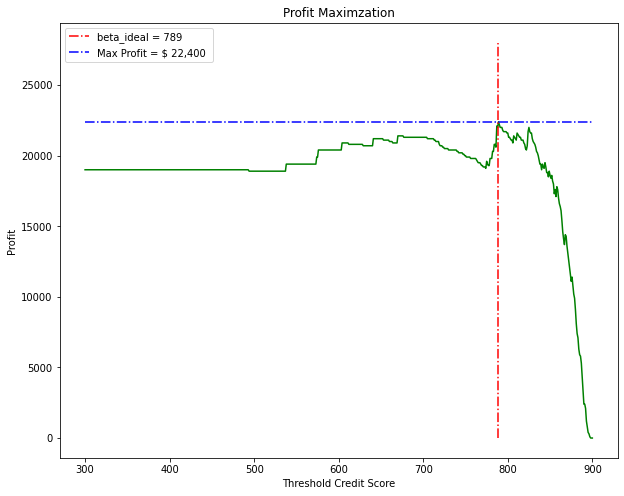

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(pf,'g')
plt.plot([789,789],[0,28000],'r-.', label = "beta_ideal = 789")
plt.plot([300,900],[22400,22400],'b-.', label = "Max Profit = $ 22,400 ")
plt.xlabel("Threshold Credit Score")
plt.ylabel("Profit")
plt.title("Profit Maximzation")
plt.legend()

In [114]:
# Threshold value decided by the bank
beta = 789 # Let
Good_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"]>beta))
Bad_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"]>beta))


In [115]:
Good_loans = np.sum(dfx_final_scores["Original Outcome"]==0)
Bad_loans = np.sum(dfx_final_scores["Original Outcome"]==1)
                

In [116]:
print("Number of Good Loans given with threshold limit at %s "% (beta), end = ": ")
print(Good_loans_Cp, end=" Out Of ")
print(Good_loans)
print("Number of Bad Loans given with threshold limit at %s "% (beta), end = ":")
print(Bad_loans_Cp, end=" Out Of ")
print(Bad_loans)

Number of Good Loans given with threshold limit at 789 : 344 Out Of 380
Number of Bad Loans given with threshold limit at 789 :24 Out Of 38


In [119]:

Profit_max = 19000
for beta in range(300,901):
    Good_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==0]["Score"]>beta))
    Bad_loans_Cp = np.sum((dfx_final_scores[dfx_final_scores["Original Outcome"]==1]["Score"]>beta))
    Profit = Good_loans_Cp*100-Bad_loans_Cp*500
    if Profit > Profit_max:
        Profit_max = Profit
        beta_ideal = beta
        
        

In [120]:
Profit_max # Max profit possible for a given threshold credit score

22400

In [121]:
beta_ideal # Ideal Threshold Credit Score

789

---
# <font color='red'>Thanks